In [1]:
#%%
import pandas as pd
import zipfile, os
import cv2
import matplotlib.pyplot as plt
import ast

In [2]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [3]:
#%%
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d atulanandjha/lfwpeople -p /content --unzip


Dataset URL: https://www.kaggle.com/datasets/atulanandjha/lfwpeople
License(s): GNU Lesser General Public License 3.0
 89% 206M/232M [00:00<00:00, 625MB/s] 
100% 232M/232M [00:00<00:00, 656MB/s]


In [5]:
import os

# عرض أول 10 ملفات/مجلدات
print(os.listdir("/content"))


['.config', 'pairs.txt', 'pairsDevTest.txt', 'pairsDevTrain.txt', 'kaggle.json', 'lfw-funneled.tgz', 'sample_data']


In [6]:
!tar -xvzf lfw-funneled.tgz -C /content


Streaming output truncated to the last 5000 lines.
lfw_funneled/Guillaume_Depardieu/Guillaume_Depardieu_0001.jpg
lfw_funneled/Delphine_Chuillot/
lfw_funneled/Delphine_Chuillot/Delphine_Chuillot_0001.jpg
lfw_funneled/Paul_LeClerc/
lfw_funneled/Paul_LeClerc/Paul_LeClerc_0001.jpg
lfw_funneled/Eddie_Jordan/
lfw_funneled/Eddie_Jordan/Eddie_Jordan_0001.jpg
lfw_funneled/Lionel_Richie/
lfw_funneled/Lionel_Richie/Lionel_Richie_0001.jpg
lfw_funneled/Lionel_Richie/Lionel_Richie_0002.jpg
lfw_funneled/Jose_Viegas_Filho/
lfw_funneled/Jose_Viegas_Filho/Jose_Viegas_Filho_0001.jpg
lfw_funneled/Jose_Viegas_Filho/Jose_Viegas_Filho_0002.jpg
lfw_funneled/Roger_Mahony/
lfw_funneled/Roger_Mahony/Roger_Mahony_0001.jpg
lfw_funneled/Clay_Aiken/
lfw_funneled/Clay_Aiken/Clay_Aiken_0001.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0002.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0003.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0004.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0005.jpg
lfw_funneled/Clay_Aiken/Clay_Aiken_0006.jpg
lfw_fun

In [7]:
import os
os.listdir("/content/lfw_funneled")[:10]   # أول 10 أسماء مجلدات أشخاص


['Brian_Campbell',
 'Joan_Dangerfield',
 'Calista_Flockhart',
 'Brad_Banks',
 'Juan_Carlos_Ortega',
 'Bill_Belichick',
 'Nick_Nolte',
 'Mikhail_Shvydkoi',
 'Kim_Chinn',
 'Masatoshi_Koshiba']

In [8]:
import glob

image_paths = glob.glob("/content/lfw_funneled/*/*.jpg")
print(len(image_paths), "images found")
print(image_paths[:5])


13233 images found
['/content/lfw_funneled/Brian_Campbell/Brian_Campbell_0001.jpg', '/content/lfw_funneled/Joan_Dangerfield/Joan_Dangerfield_0001.jpg', '/content/lfw_funneled/Calista_Flockhart/Calista_Flockhart_0003.jpg', '/content/lfw_funneled/Calista_Flockhart/Calista_Flockhart_0001.jpg', '/content/lfw_funneled/Calista_Flockhart/Calista_Flockhart_0006.jpg']


In [9]:
image_paths = glob.glob("/content/lfw_funneled/*/*.jpg")

# الشخص = اسم المجلد الأب
data = pd.DataFrame({
    "path": image_paths,
    "person": [p.split("/")[-2] for p in image_paths]
})

print("🔢 Total images:", len(data))
print("👤 Unique persons:", data['person'].nunique())
data.head()


🔢 Total images: 13233
👤 Unique persons: 5749


,path,person
0,/content/lfw_funneled/Brian_Campbell/Brian_Cam...,Brian_Campbell
1,/content/lfw_funneled/Joan_Dangerfield/Joan_Da...,Joan_Dangerfield
2,/content/lfw_funneled/Calista_Flockhart/Calist...,Calista_Flockhart
3,/content/lfw_funneled/Calista_Flockhart/Calist...,Calista_Flockhart
4,/content/lfw_funneled/Calista_Flockhart/Calist...,Calista_Flockhart


In [10]:
counts = data['person'].value_counts()
print("📊 Avg images per person:", counts.mean())
print("Min:", counts.min(), "Max:", counts.max())

# أعلى 10 أشخاص بعدد صورهم
counts.head(10)


📊 Avg images per person: 2.301791615933206
Min: 1 Max: 530


,count
person,
George_W_Bush,530
Colin_Powell,236
Tony_Blair,144
Donald_Rumsfeld,121
Gerhard_Schroeder,109
Ariel_Sharon,77
Hugo_Chavez,71
Junichiro_Koizumi,60
Jean_Chretien,55


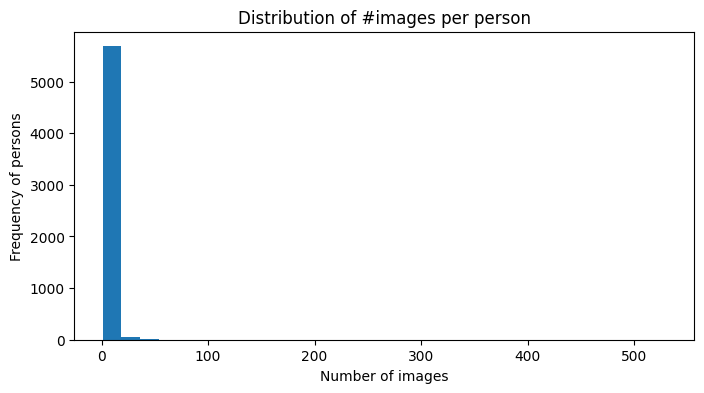

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
counts.plot(kind='hist', bins=30)
plt.title("Distribution of #images per person")
plt.xlabel("Number of images")
plt.ylabel("Frequency of persons")
plt.show()


In [12]:
from PIL import Image
import numpy as np

def get_size(path):
    with Image.open(path) as im:
        return im.size  # (width, height)

data["size"] = data["path"].apply(get_size)
data[["width","height"]] = pd.DataFrame(data["size"].tolist(), index=data.index)

print(data[["width","height"]].describe())


         width   height
count  13233.0  13233.0
mean     250.0    250.0
std        0.0      0.0
min      250.0    250.0
25%      250.0    250.0
50%      250.0    250.0
75%      250.0    250.0
max      250.0    250.0


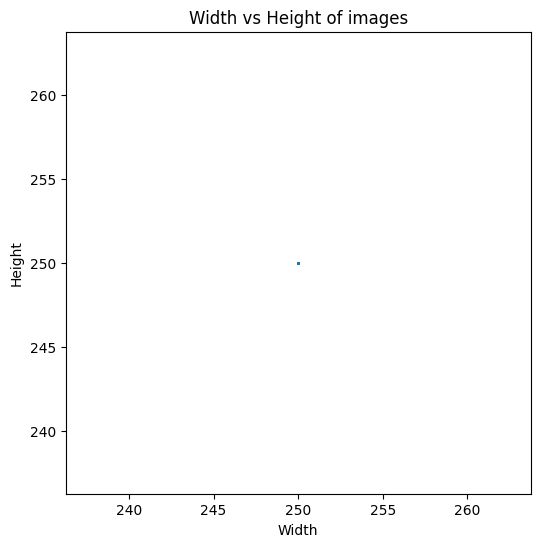

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(data["width"], data["height"], alpha=0.3, s=1)
plt.xlabel("Width")
plt.ylabel("Height")
plt.title("Width vs Height of images")
plt.show()


In [14]:
bad_files = []
for p in data["path"]:
    try:
        with Image.open(p) as im:
            im.verify()   # يتأكد من سلامة الملف
    except Exception as e:
        bad_files.append((p, str(e)))

print("🚨 Corrupted images:", len(bad_files))


🚨 Corrupted images: 0
